In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [8]:
df = pd.read_csv('../final_data_set/all_data_no_dums.csv')

In [9]:
years = df.groupby('Year').sum()[['Fire Area']].reset_index()

/var/folders/f9/9vn_4nrs38q_5092cm0ssfhm0000gn/T/ipykernel_45272/3465965979.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  years = df.groupby('Year').sum()[['Fire Area']].reset_index()


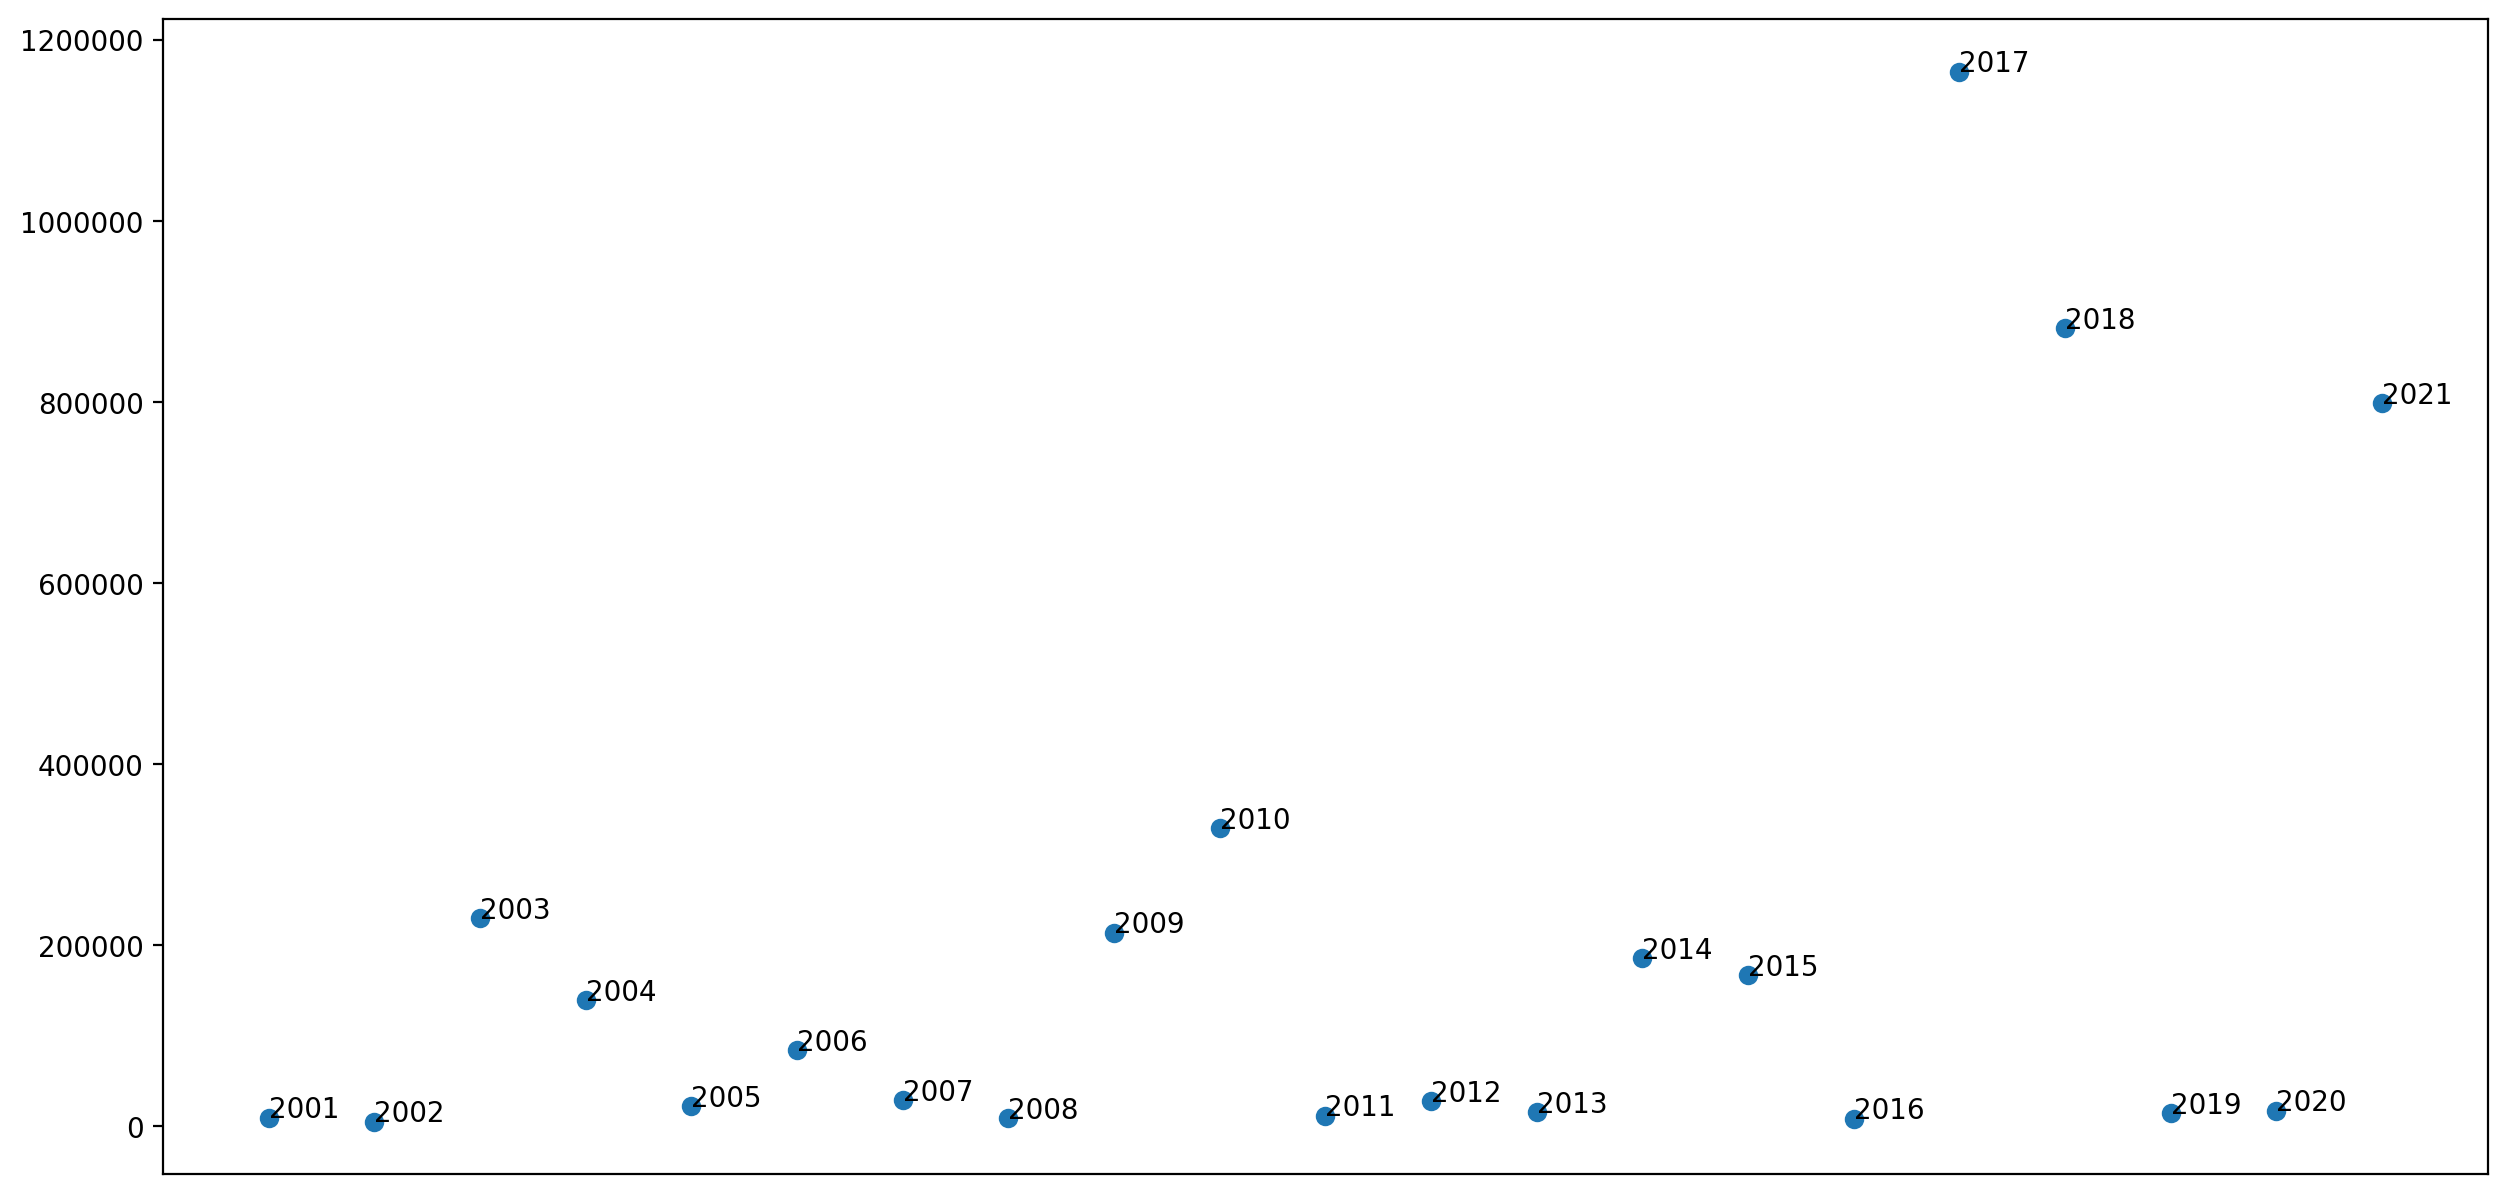

In [10]:
fig, ax = plt.subplots(figsize=(15,7.5), dpi=200)
ax.scatter(years['Year'], years['Fire Area'])
ax.ticklabel_format(style='Plain')
ax.set_xticks([])
for i, txt in enumerate(years['Year']):
    #if years['Fire Area'][i] > 800000:
        ax.annotate(txt, (years['Year'][i], years['Fire Area'][i]))
plt.savefig('output/fires_over_years/Wildfires_over_years.png')

In [11]:
stack_data = df.groupby(['Year','Region Name']).sum()[['Fire Area']].reset_index().pivot(index='Region Name', values='Fire Area', columns='Year')

In [12]:
stack_data

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region Name,,,,,,,,,,,,,,,,,,,,,
Alberni-Clayquot,0.309,17.419,1.287,2.627,1.031,2.509,0.430,37.566,2.105,3.034,...,0.555,3.885,1.084,455.872,6.724,1.365,35.427,20.691,0.318,2.364
Bulkley-Nechako + Stikine,74.520,1011.999,926.033,95267.208,13095.490,28637.026,9424.449,5681.180,22757.191,143042.627,...,22977.594,4323.331,145540.963,79283.141,5780.630,8706.173,540220.138,4314.339,20.994,83505.739
Capital,0.223,11.668,23.427,15.998,1.586,35.527,4.577,13.358,8.227,33.436,...,4.854,3.036,9.627,406.318,2.787,1.345,86.358,5.186,15.516,1.568
Cariboo,574.690,815.390,32423.156,13584.967,948.979,39697.397,764.817,830.766,85023.940,175896.611,...,597.636,2481.262,23673.524,9908.504,382.294,844406.276,55748.756,101.520,3058.761,31095.771
Central Kootenay,331.853,138.050,35012.600,398.078,66.980,1449.538,12217.888,983.009,316.797,126.664,...,130.732,334.805,493.985,3888.101,40.700,10967.728,28543.215,15.497,2498.022,60515.782
Central Okanagan,20.775,3.775,20.761,4.876,25.000,19.139,21.727,9.609,9899.424,50.877,...,295.898,5.463,401.213,738.589,82.791,4543.403,59.275,2.208,19.516,1920.171
Columbia-Shuswap,1713.746,70.456,19114.803,347.079,9.624,2656.217,106.232,18.928,4298.873,991.837,...,34.433,149.191,845.894,905.911,63.216,6894.210,4691.983,25.993,74.986,15252.625
Comox + Strathacona,1.385,44.682,3.183,20.499,0.539,49.100,5.870,130.031,1772.200,1.617,...,364.006,8.783,76.781,4.121,13.514,2.100,9698.055,46.234,408.242,33.886
Cowichan Valley,0.227,22.110,11.611,7.678,5.183,4.829,5.638,7.397,4.697,0.172,...,21.293,0.154,2.514,31.945,6.757,2.427,6.454,2.346,8.035,94.634


In [13]:
r_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
            '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', 
            '#808000', '#ffd8b1', '#000075']
r_colors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
             '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', 
             '#808000', '#ffd8b1', '#000075', '#80d2d7', '#bebc88', '#b5f7c8']



In [14]:
patch_dict = {}
for i in range(len(stack_data.index)):
    patch_dict[r_colors2[i]] = stack_data.index[i]
patch_list = []
for k, v in patch_dict.items():

    patch_list.append(mpatches.Patch(color=k, label=v))

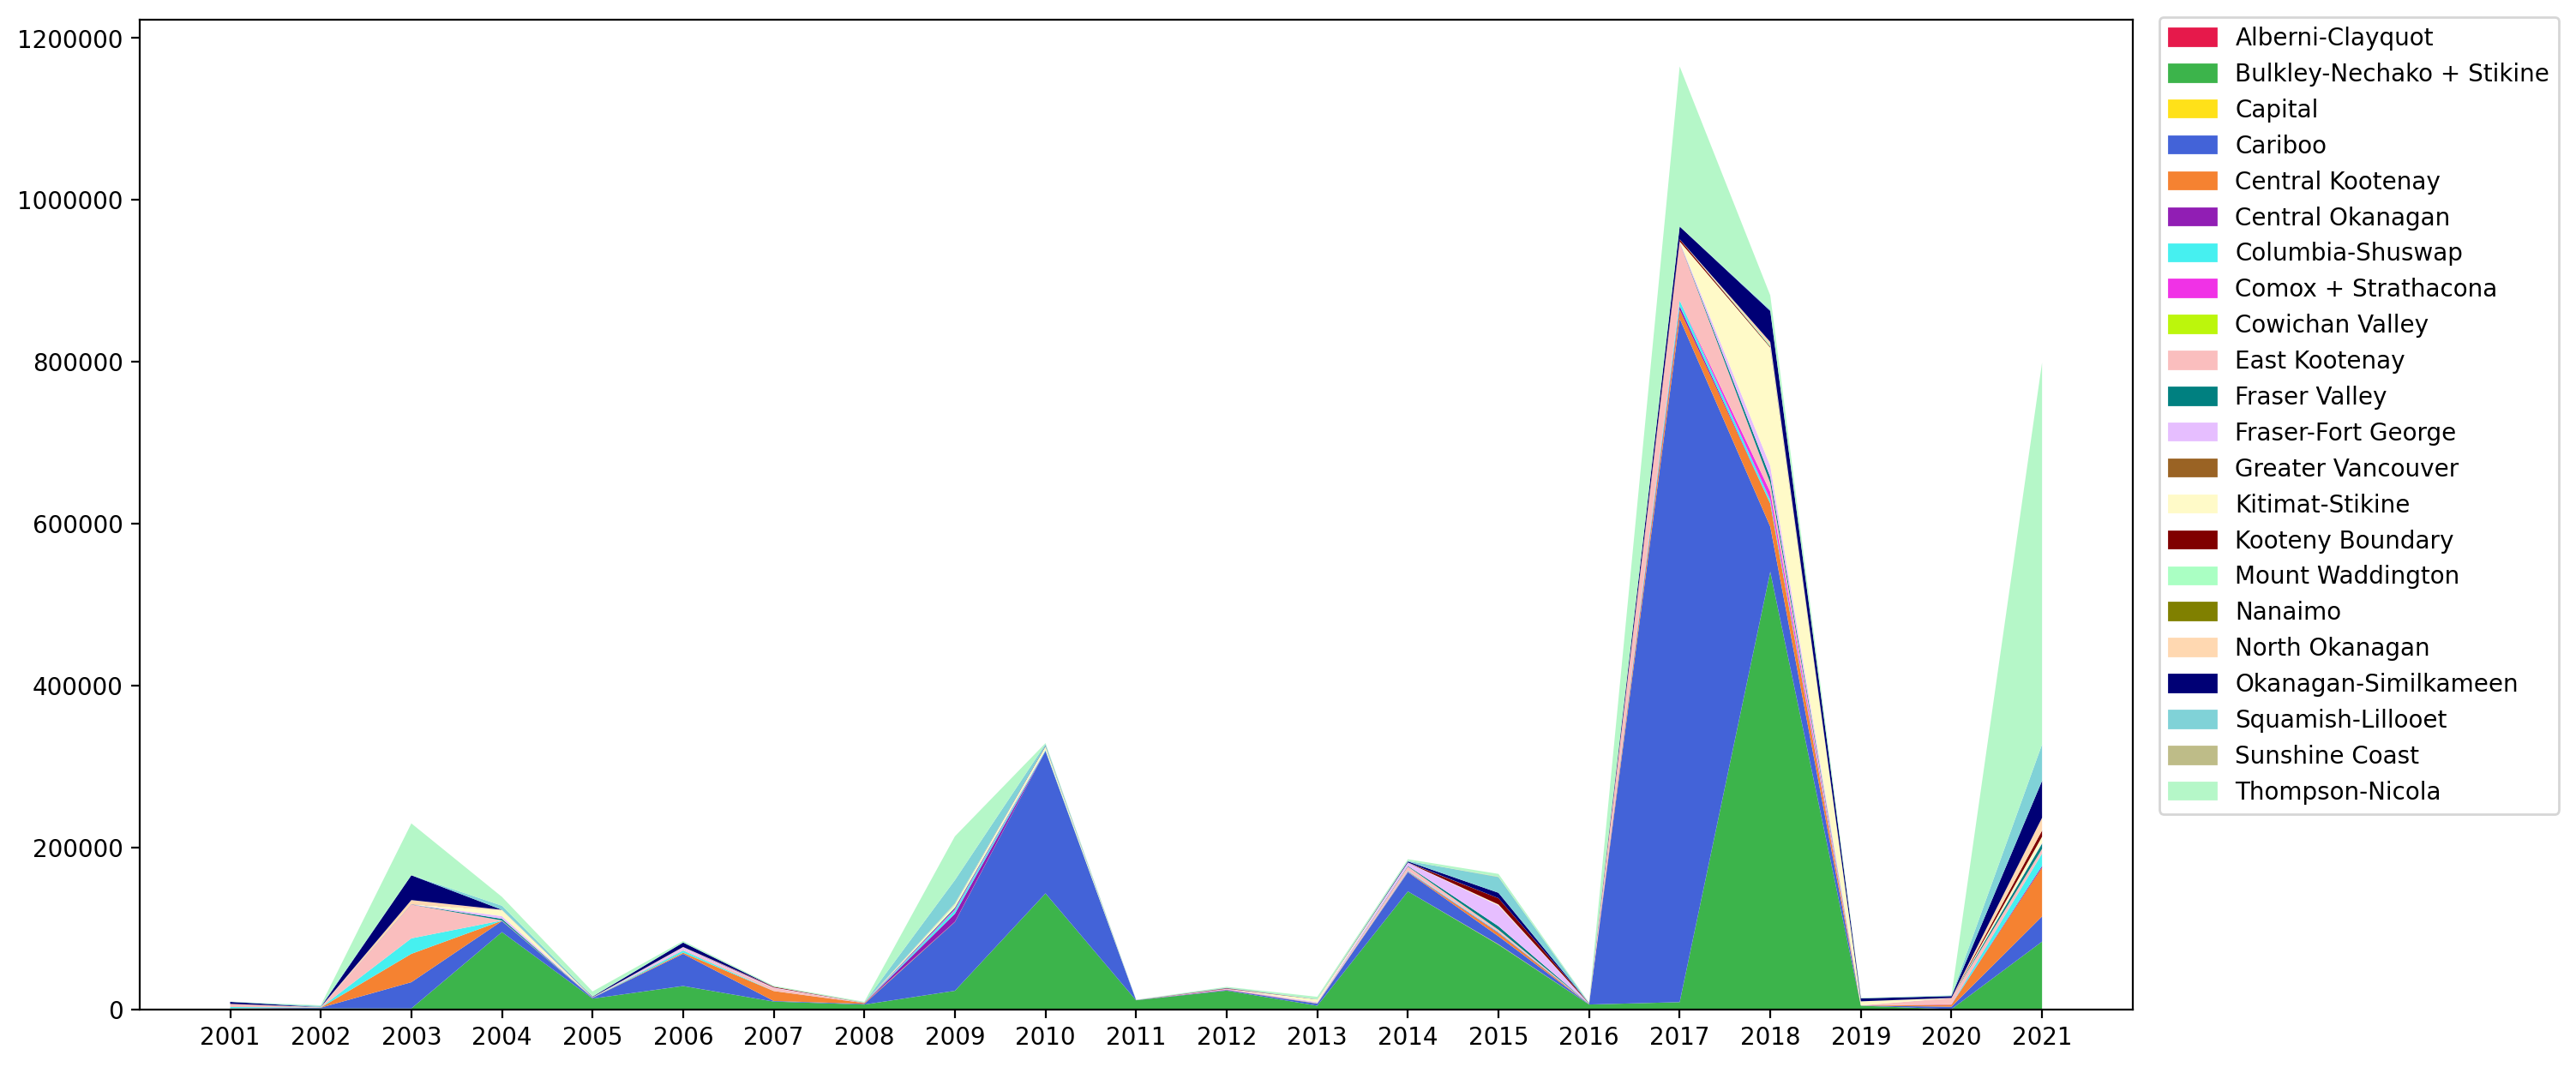

In [39]:
fig, ax = plt.subplots(figsize=(15,7.5), dpi=200)
ax.stackplot(np.array(stack_data.columns, int), stack_data.to_numpy(), colors=r_colors2)
ax.ticklabel_format(style='Plain')
ax.set_xticks(np.array(stack_data.columns, int))
plt.legend(handles=patch_list, loc='right', fontsize='10', bbox_to_anchor=(1.22, 0.6))
plt.savefig('output/fires_over_years/Stacked_Wildfires_over_years.png')